# **합성곱 신경망 (CNN)**

- 합성곱 계층(Convolutional layer)

- 풀링 계층(pooling layer)

- 완전 연결 계층(Fully-Connected layer, FC layer) : 인접하는 계층의 모든 뉴런과 결합된 계층. 지금까지는 Affine 계층으로 명명함.

## 1. 완전 연결 계층으로 이루어진 신경망

다수의 FC layer와 ReLU 함수의 조합으로 구성된다.

마지막 층은 FC layer와 소프트맥스 계층으로 구성된다. (소프트맥스는 각각의 확률, 즉 최종 결과를 출력해준다.)

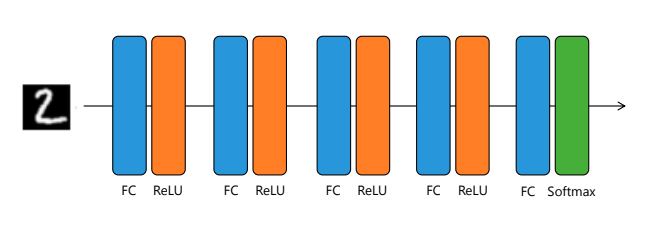

- 완전 연결 계층의 문제점
 - 1) 데이터의 형상(shape)이 무시된다.
 > 영상의 경우 가로, 세로, 채널 (색상)으로 구성된 3차원 데이터인데, **완전 연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화를 해야 한다.**

 - 2) 공간적 정보가 사라진다.
 > 공간적으로 가까운 픽셀들은 값이 비슷한데, RGB의 각 채널은 서로 밀접한 관련이 있다. 거리가 먼 픽셀 간에는 연관성이 떨어지고 이런 패턴들이 무시되는 문제가 있다. **모든 입력 데이터를 동등한 뉴런으로 취급해서 형상에 담긴 정보를 살릴 수 없다.**

## 2. 합성곱 신경망(CNN)

Conv layer와 pooling layer를 추가한다.

Conv - ReLU - (pooling) 흐름으로 연결된다.

출력에 가까운 층에는 fully connected layer와 ReLU 조합을 사용 가능하다.

마지막 층에는 소프트맥스 계층을 배치해서 최종 결과 (각 클래스의 확률)을 출력한다.

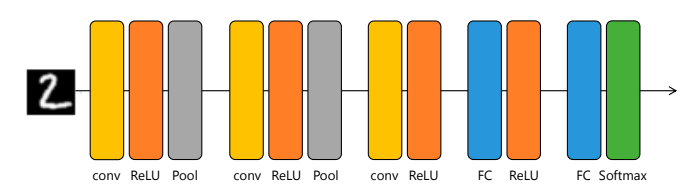

- 특징 맵(feature map) : 합성곱 계층의 입출력 데이터

- 입력 데이터에 필터(or 커널)을 적용한다.

 - 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용한다.
 - 입력과 필터에서 대응하는 원소끼리 곱한 후 총합을 계산한다.
 - 계산 결과를 출력의 해당 위치에 저장한다.
 - 이 과정을 모든 위치에 대해 수행한다.

 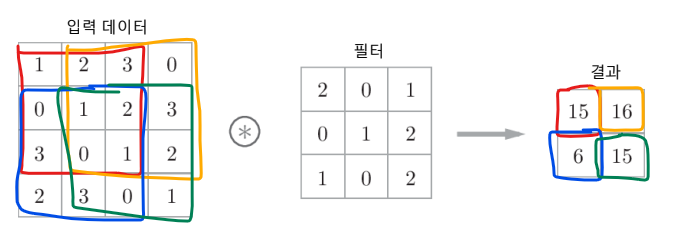

 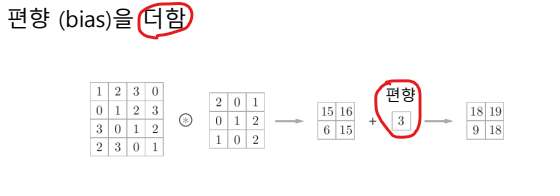

- 패딩(padding) : 입력 데이터 주변을 특정 값(ex. 0)으로 채운다.

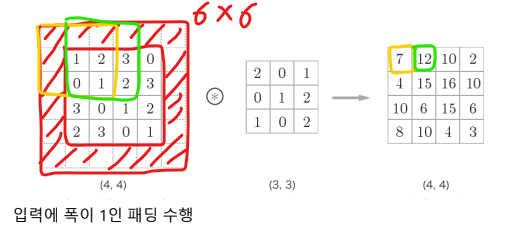

4x4 입력 데이터가 폭이 1인 패딩을 수행해서 6x6이 되고, 3x3의 필터를 적용하면 4x4인 출력 데이터가 생성된다.

패딩을 적절한 크기로 수행하면 입력과 출력이 같은 크기로 나올 수 있다.

패딩의 폭을 크게 설정하면 출력이 커진다.

zero padding : 0으로 주변 값을 채운다

- 스트라이드(stride) : 필터를 적용하는 위치의 간격

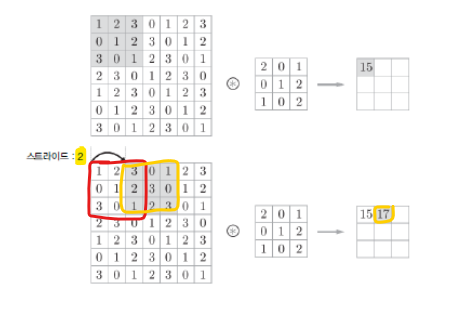

스트라이드가 커지면 출력이 작아진다.

## 3. 합성곱 연산

입력(H, W), 필터 크기(FH, FW), 출력 크기(OH, OW), 패딩 P, 스트라이드 S 일 때 출력 크기

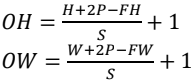

패딩이 커지면 출력의 크기가 커진다.

필터의 크기가 커지면 출력의 크기가 작아진다.



---



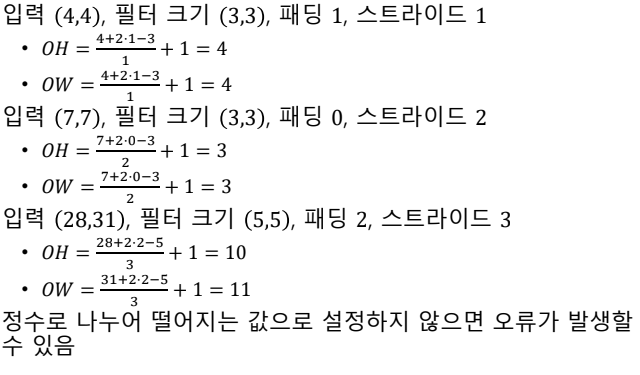

### 3차원 데이터의 합성곱 연산

- 각 채널마다(RGB라면 R 따로 G 따로 B 따로) 합성곱 연산을 수행한다.
- 이미지 크기 = 채널 수(R, G, B 이니까 3) x 높이 x 너비

- 입력 데이터의 채널 수와 필터의 채널 수가 동일해야 한다.

- 모든 채널의 필터의 크기가 같아야 한다.

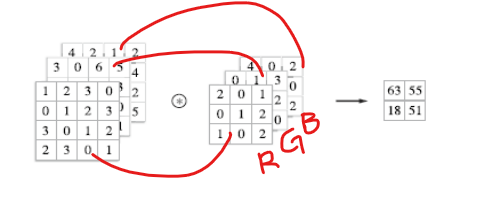

필터 크기는 원하는 값으로 설정 가능.

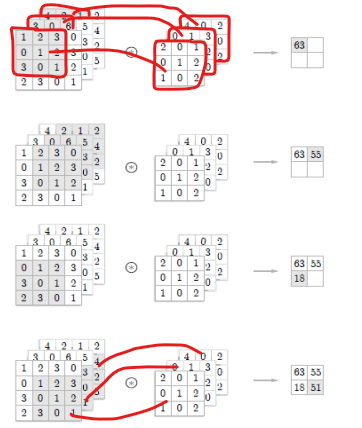

**입력 데이터 : (C, H, W)**

**필터 : (C, FH, FW)**

**출력 데이터 : (1, OH, OW)**

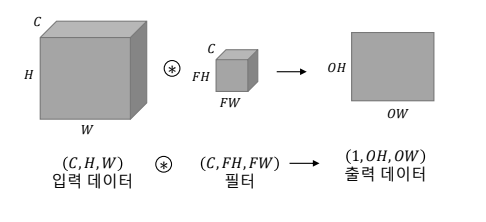

출력 데이터의 채널이 여러개였으면 좋겠다

-> 필터의 개수를 늘리면 출력 데이터의 채널 수가 늘어난다.

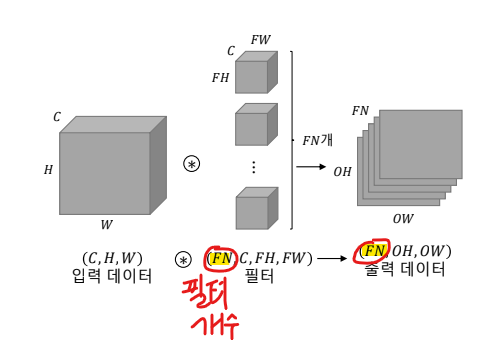

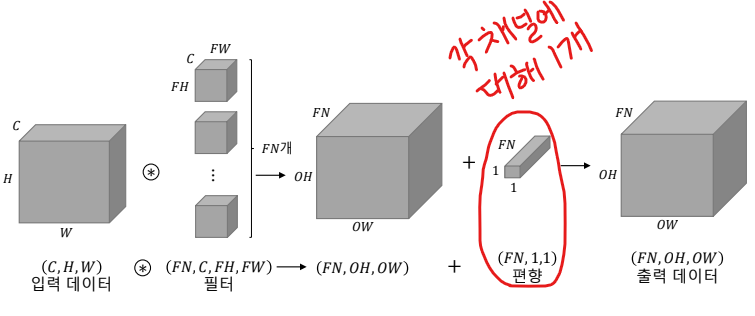

N개의 데이터로 구성된 미니 배치 -> N개의 데이터를 한번에 처리한다.

각 N개의 데이터에 동일한 필터를 적용한다.

입력과 출력이 모두 N개의 데이터이다.

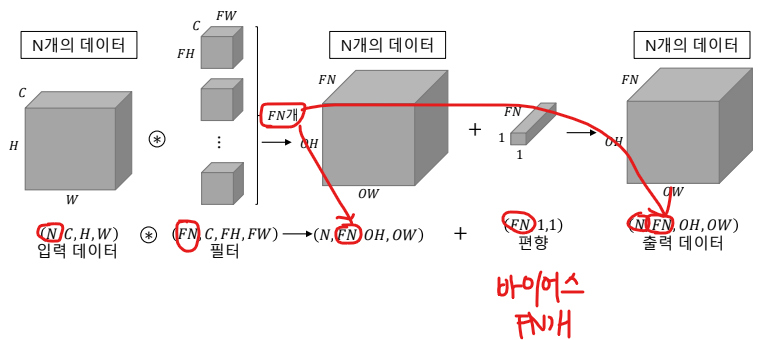

## 4. 풀링 계층

가로, 세로 방향의 공간을 줄이는 연산을 한다.

max pooling : 최대값을 구하는 연산을 한다.

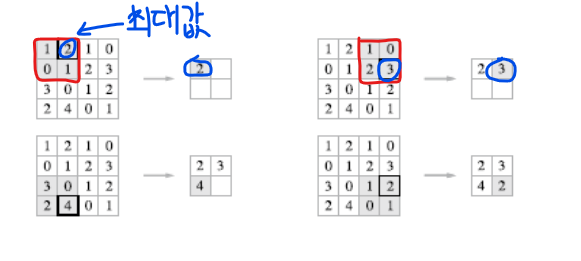

min pooling : 최솟값을 구하는 연산을 한다.

average pooling : 영역에 있는 원소들의 평균을 구하는 연산을 한다.

일반적으로 풀링의 크기와 스트라이드는 같은 값으로 설정한다.
(윈도우의 크기가 3x3이면 스트라이드도 3이어야 한다.)

- 학습할 매개변수가 없다.
 > 대상 영역에서 최대값이나 평균값을 구하는 연산만 수행하기 때문에

- 채널 수가 변하지 않는다.
 > 각 채널 별로 독립적인 계산이 이루어지기 때문에

- 입력의 변화에 영향을 적게 받는다.
 > 입력 데이터가 한 칸씩 어긋났다고 가정해도 풀링 연산 결과가 같을 확률이 높다.

- 일반적으로 입력 영상의 크기를 줄일 때 사용한다.
 > 풀링을 통해 영상의 크기를 줄이면 같은 3x3 합성곱 연산을 하더라도 넓은 영역에 적용하는 효과를 가져온다.

 >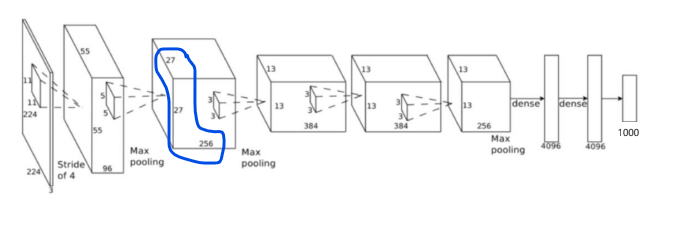

 - 수용영역을 넓히는 효과.
 > 수용 영역 : 출력의 뉴런 하나에 영향을 미치는 입력 뉴런들의 공간 크기

### 4차원 배열

In [ ]:
import numpy as np

In [ ]:
x = np.random.rand(10, 1, 28, 28)
print(x.shape)

(10, 1, 28, 28)


In [ ]:
x[0] #첫번째 데이터

array([[[8.08938151e-02, 4.54101118e-02, 9.78532068e-01, 7.69404001e-01,
         3.18292017e-01, 3.38165415e-01, 6.39700409e-01, 1.09055990e-02,
         9.95171845e-01, 9.09144467e-01, 1.62806582e-02, 9.51881207e-01,
         8.41057827e-01, 5.18128840e-01, 6.92676180e-01, 9.57079430e-01,
         8.52444858e-01, 4.21753920e-01, 5.26698403e-01, 7.04998700e-01,
         7.56200177e-01, 8.09445493e-01, 8.55025620e-01, 3.42595544e-01,
         3.77499924e-01, 3.93155148e-01, 6.57563632e-01, 8.15487119e-02],
        [8.82462573e-01, 4.74333379e-01, 6.09253122e-01, 3.18099980e-01,
         5.99455505e-01, 1.67144212e-01, 3.24680778e-01, 1.84170107e-01,
         9.84765914e-01, 6.26018825e-01, 9.02873350e-01, 3.74850013e-01,
         8.61426600e-01, 2.83908171e-01, 7.29813924e-01, 3.65008303e-01,
         1.85741530e-01, 8.10831255e-01, 6.68804132e-01, 5.00814334e-01,
         5.01705727e-01, 5.80456881e-01, 4.35871692e-01, 6.49309042e-01,
         7.57016060e-01, 4.66733625e-01, 9.3142112

In [ ]:
x[0].shape

(1, 28, 28)

In [ ]:
x[0, 0] #첫번째 데이터의 첫번째 채널

array([[8.08938151e-02, 4.54101118e-02, 9.78532068e-01, 7.69404001e-01,
        3.18292017e-01, 3.38165415e-01, 6.39700409e-01, 1.09055990e-02,
        9.95171845e-01, 9.09144467e-01, 1.62806582e-02, 9.51881207e-01,
        8.41057827e-01, 5.18128840e-01, 6.92676180e-01, 9.57079430e-01,
        8.52444858e-01, 4.21753920e-01, 5.26698403e-01, 7.04998700e-01,
        7.56200177e-01, 8.09445493e-01, 8.55025620e-01, 3.42595544e-01,
        3.77499924e-01, 3.93155148e-01, 6.57563632e-01, 8.15487119e-02],
       [8.82462573e-01, 4.74333379e-01, 6.09253122e-01, 3.18099980e-01,
        5.99455505e-01, 1.67144212e-01, 3.24680778e-01, 1.84170107e-01,
        9.84765914e-01, 6.26018825e-01, 9.02873350e-01, 3.74850013e-01,
        8.61426600e-01, 2.83908171e-01, 7.29813924e-01, 3.65008303e-01,
        1.85741530e-01, 8.10831255e-01, 6.68804132e-01, 5.00814334e-01,
        5.01705727e-01, 5.80456881e-01, 4.35871692e-01, 6.49309042e-01,
        7.57016060e-01, 4.66733625e-01, 9.31421126e-01, 4.32937

### 합성곱/풀링 계층 구현하기

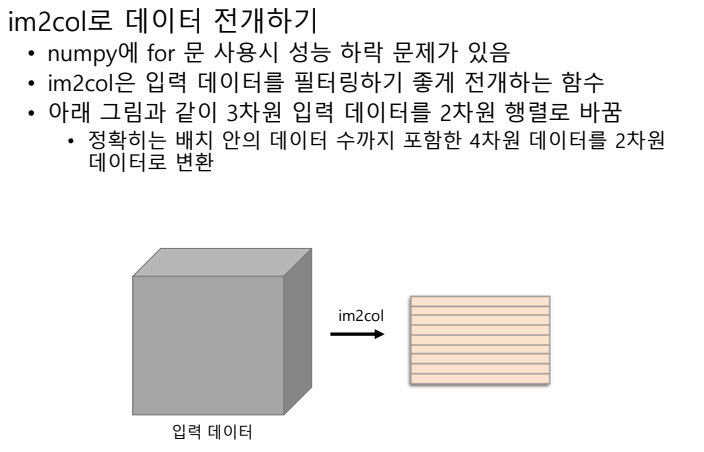

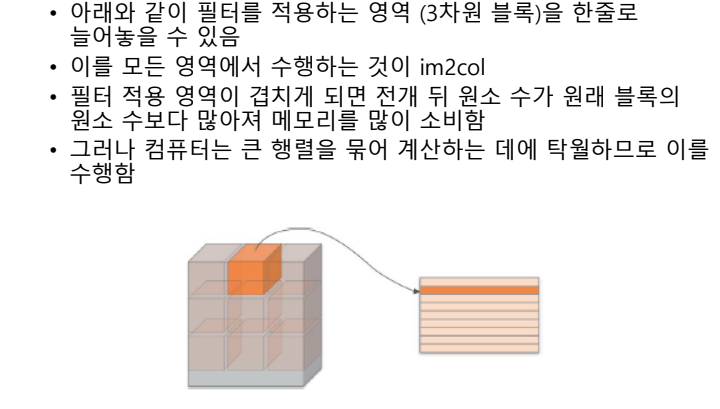

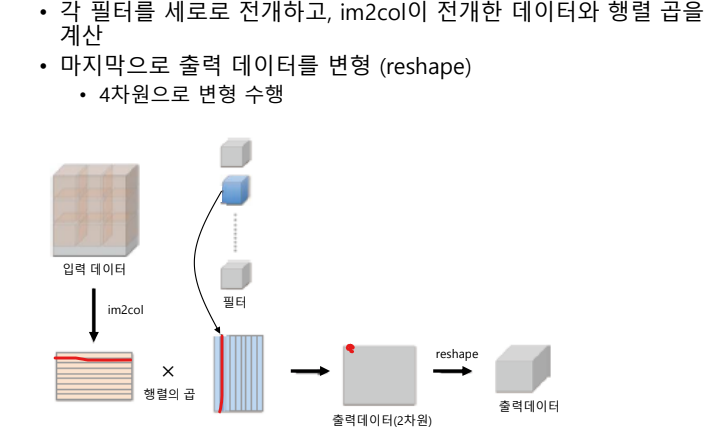

im2col의 인터페이스

im2col(input_data, filter_h, filter_w, stride=1, pad=0)

- input_data - (데이터 수, 채널 수, 높이, 너비)의 4차원 배열로 이루어진 입력 데이터
- filter_h - 필터의 높이
- filter_w - 필터의 너비
- stride - 스트라이드
- pad - 패딩

In [ ]:
import sys, os

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/7')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

from common.util import im2col

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) #(9, 75) 9개의 입력, 75개의 채널

(9, 75)


In [ ]:
x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) #(90, 75) 90개의 입력, 75개의 채널

(90, 75)


In [ ]:
class Convolution:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = x.shape

    out_h = 1 + int((H + 2 * self.pad - FH) / self.stride)
    out_w = 1 + int((W + 2 * self.pad - FW) / self.stride)
    col = im2col(x, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T
    out = np.dot(col, col_W) + self.b
    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    return out

In [ ]:
W = np.random.rand(5, 3, 3, 3) #3x3 conv, 입력 채널 개수는 3, 필터의 개수(출력 채널 개수)는 5
b = np.random.rand(5) #편향은 필터 개수와 동일하게 설정
X = np.random.rand(2, 3, 7, 7) #2개의 배치, 3개의 채널, 7x7 크기의 영상
conv = Convolution(W, b, stride=1, pad=1)
out = conv.forward(X)

print(out.shape)

(2, 5, 7, 7)


reshape 두 번째 인수 -1로 지정

reshape에 -1을 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지하도록 묶어줌

예를 들어 (10, 3, 5, 5), 총 750개 원소로 구성된 배열에 reshape(10, -1)을 호출하면 750개의 원소를 10묶음으로, (10, 75)인 배열로 만들어줌

transpose 함수는 다차원 배열의 축 순서를 바꿔주는 함수임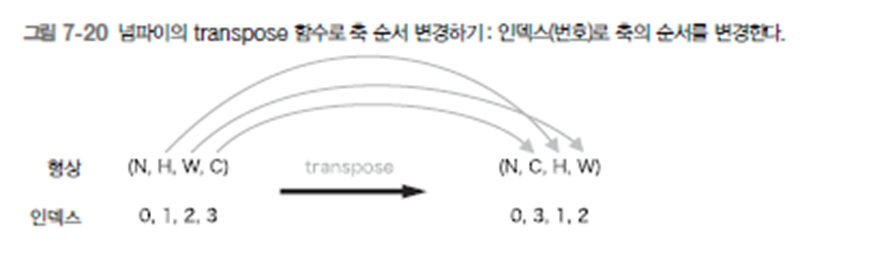

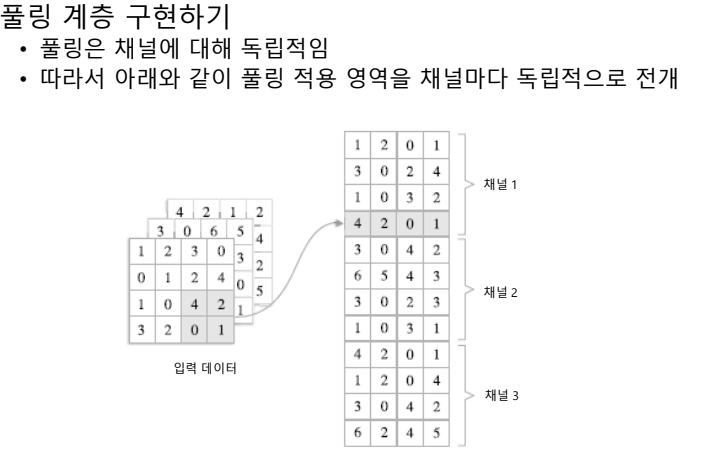

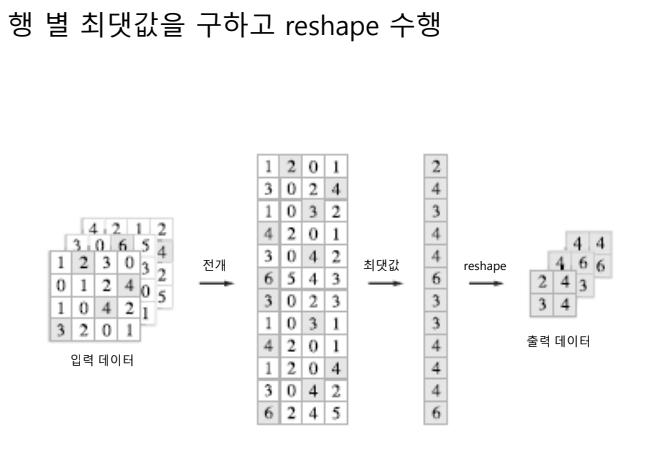

In [ ]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)

    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h * self.pool_w)
    out = np.max(col, axis=1)
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    return out

In [ ]:
pool = Pooling(pool_h=2,pool_w=2,stride=2,pad=0)
# 2개의 배치, 3개의 채널, 4x4 크기의 영상
X = np.random.rand(2,3,4,4)
out = pool.forward(X)

print(X)
print(out)
print(out.shape)

[[[[4.71189763e-01 3.42565053e-01 9.56348248e-01 4.76233110e-01]
   [6.74262976e-01 8.27990400e-01 1.73816256e-01 3.75129361e-01]
   [8.61067924e-01 6.34470570e-01 2.86593357e-01 9.06430584e-01]
   [5.46765444e-01 2.49497712e-01 1.79065969e-01 5.36855648e-01]]

  [[6.05882420e-01 8.78500957e-01 7.35082429e-01 9.87877616e-01]
   [5.70999368e-01 8.24343970e-02 3.78333410e-01 1.54951542e-01]
   [5.86248153e-01 7.95776948e-01 1.54345713e-01 8.51654506e-01]
   [7.30238353e-01 7.43409383e-01 1.78561726e-01 3.69448104e-01]]

  [[6.45071560e-01 6.04511179e-01 3.00379332e-01 7.80446586e-01]
   [2.66666455e-01 4.56548895e-01 5.92428077e-01 3.19223184e-01]
   [2.58351565e-01 6.20798011e-02 7.07776317e-01 1.60822557e-01]
   [3.33478949e-01 7.85592784e-01 6.44945007e-01 5.42922001e-01]]]


 [[[9.70360644e-02 4.37839369e-02 1.82184279e-01 3.05415450e-01]
   [6.75755452e-02 4.60433168e-01 4.76564035e-01 3.44429540e-01]
   [1.73747592e-01 8.37719081e-01 9.51133592e-01 9.46261894e-02]
   [4.11920666e-0

### CNN 구현하기

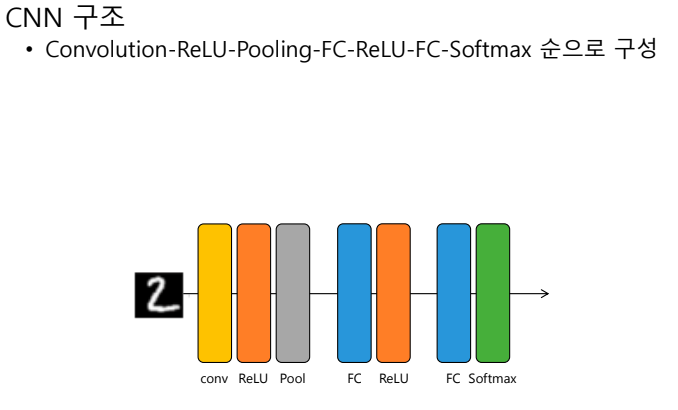

SimpleConvNet이라는 이름의 클래스로 구현
- 초기화 (__init__)시 받는 인수
- input_dim – 입력 데이터 (채널 수, 높이, 너비)의 차원
- conv_param – 합성곱 계층의 하이퍼파라미터 (딕셔너리),
딕셔너리의 키는 다음과 같음
- filter_num – 필터 수
- filter_size – 필터 크기
- stride – 스트라이드
- pad – 패딩
- hidden_size – 은닉층(완전연결)의 뉴런 수
- output_size – 출력층(완전연결)의 뉴런 수
- weight_init_std – 초기화 때의 가중치 표준편차

In [1]:
import sys, os

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/7')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient

Mounted at /content/drive


In [2]:
class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        # 구현하기
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        # 구현하기
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [ ]:
class SimpleConvNet:
  def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
               hidden_size=100, output_size=10, weight_init_std=0.01):
    filter_num = conv_param['filter_num']
    filter_size = conv_param['filter_size']
    filter_pad = conv_param['pad']
    filter_stride = conv_param['stride']
    input_size = input_dim[1]

    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
    self.params['b1'] = np.zeros(filter_num)
    self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
    self.params['b2'] = np.zeros(hidden_size)
    self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b3'] = np.zeros(output_size)

    self.layers = OrderedDict()
    self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
    self.layers['Relu1'] = Relu()
    self.layers['Pool1'] = Pooling(pool_h = 2, pool_w = 2, stride = 2)
    self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
    self.layers['Relu2'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
    self.last_layer = SoftmaxWithLoss()


  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x


  def loss(self, x, t):
    """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
    y = self.predict(x)
    return self.last_layer.forward(y, t)


  def accuracy(self, x, t, batch_size=100):
    if t.ndim != 1 : t = np.argmax(t, axis=1)

    acc = 0.0

    for i in range(int(x.shape[0] / batch_size)):
      tx = x[i*batch_size:(i+1)*batch_size]
      tt = t[i*batch_size:(i+1)*batch_size]
      y = self.predict(tx)
      y = np.argmax(y, axis=1)
      acc += np.sum(y == tt)

    return acc / x.shape[0]


  def gradient(self, x, t):
    """기울기를 구한다(오차역전파법).

    Parameters
    ----------
    x : 입력 데이터
    t : 정답 레이블

    Returns
    -------
    각 층의 기울기를 담은 사전(dictionary) 변수
      grads['W1']、grads['W2']、... 각 층의 가중치
      grads['b1']、grads['b2']、... 각 층의 편향 """

    # forward
    self.loss(x, t)

    # backward
    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    # 결과 저장
    grads = {}
    grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
    grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
    grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

    return grads

  def save_params(self, file_name="params.pkl"):
    params = {}
    for key, val in self.params.items():
      params[key] = val
    with open(file_name, 'wb') as f:
      pickle.dump(params, f)

  def load_params(self, file_name="params.pkl"):
    with open(file_name, 'rb') as f:
      params = pickle.load(f)
    for key, val in params.items():
      self.params[key] = val

    for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
      self.layers[key].W = self.params['W' + str(i+1)]
      self.layers[key].b = self.params['b' + str(i+1)]

In [3]:
import sys, os

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/7')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


train loss:2.299555403941936
=== epoch:1, train acc:0.087, test acc:0.089 ===
train loss:2.2976427277656195
train loss:2.294267158656988
train loss:2.2893563783184687
train loss:2.278230957287751
train loss:2.274868490360492
train loss:2.2639644317395375
train loss:2.245948176896091
train loss:2.2285837117723384
train loss:2.2060433447809342
train loss:2.1915617415739117
train loss:2.1384859401703498
train loss:2.1278141897360294
train loss:2.0810252033268024
train loss:2.0092127286504233
train loss:1.967617451704081
train loss:1.8911669842049887
train loss:1.8541943123325095
train loss:1.7538446860601398
train loss:1.6952623280952006
train loss:1.5875368286450402
train loss:1.483030856927699
train loss:1.405295555331941
train loss:1.2904678850059446
train loss:1.2922014420742656
train loss:1.2508605082939
train loss:1.1807737543353054
train loss:1.1115999002900896
train loss:1.0601252221641217
train loss:0.9082958711271051
train loss:0.9206077339787971
train loss:0.8989386715752334
tr

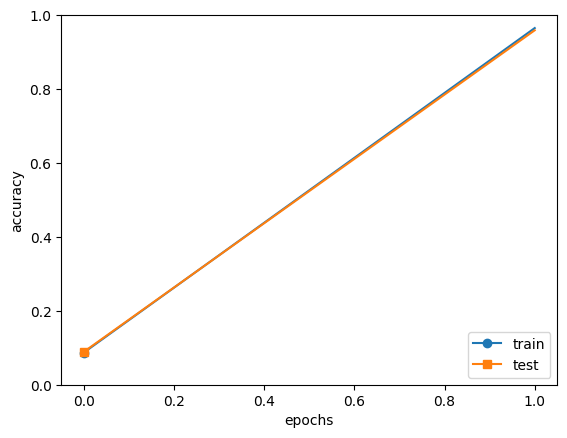

In [4]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

#max_epochs = 20
max_epochs = 2

# 작성하기
network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

7 [7]
2 [2]
1 [1]
0 [0]
4 [4]
1 [1]
4 [4]
9 [9]
5 [5]


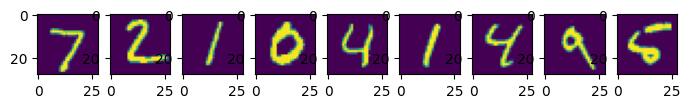

In [5]:
network1 = SimpleConvNet()
network1.load_params("params.pkl")

fig = plt.figure()

fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
for i in range(9):
    x_test_sample = x_test[i:i+1,:]
    x_test_sample_img = x_test_sample.reshape(28,28)
    ax = fig.add_subplot(1, 9, i+1)
    ax.imshow(x_test_sample_img)
    x_test_sample_predict = network1.predict(x_test_sample)
    x_test_sample_predict = np.argmax(x_test_sample_predict, axis=1)
    t_test_sample = t_test[i]
    print(t_test_sample, x_test_sample_predict)
plt.show()

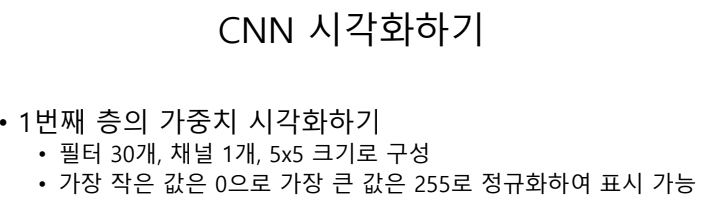

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def filter_show(filters, nx=8, margin=3, scale=10):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

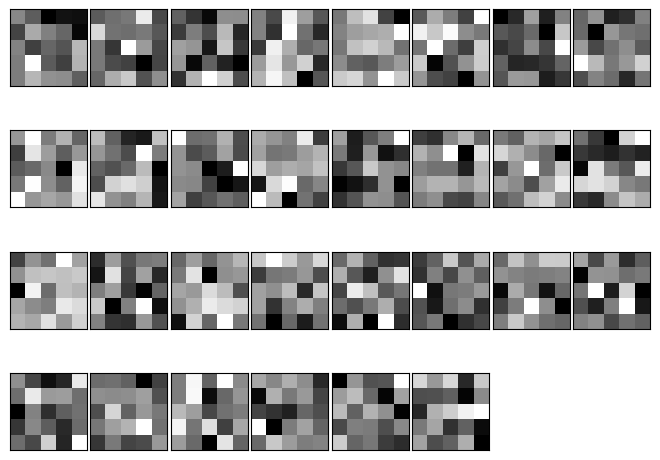

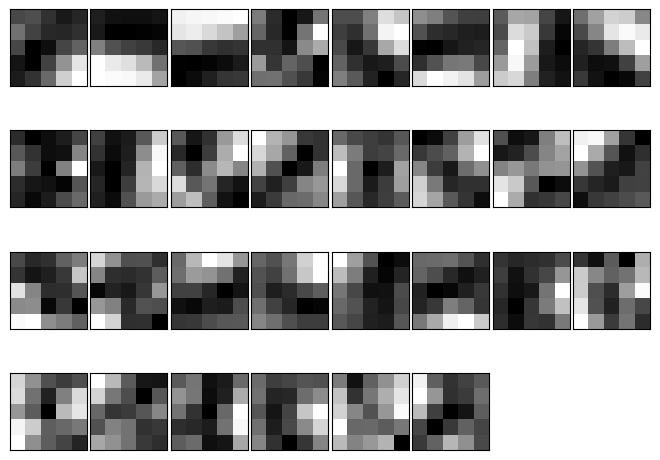

In [7]:
# 작성
network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

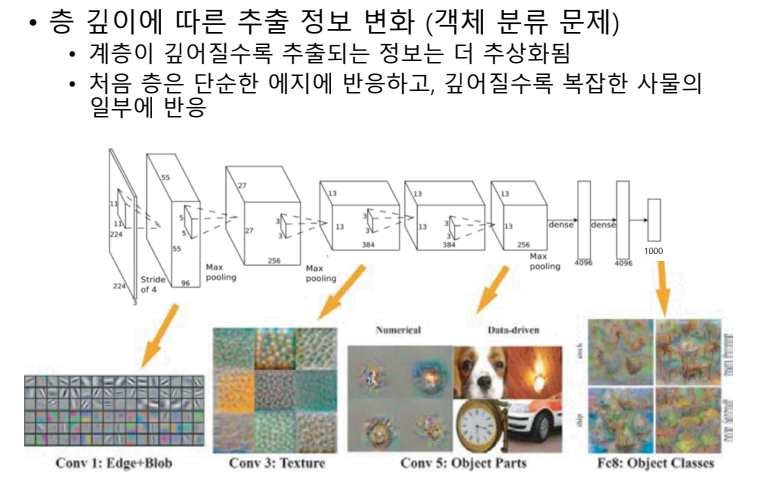

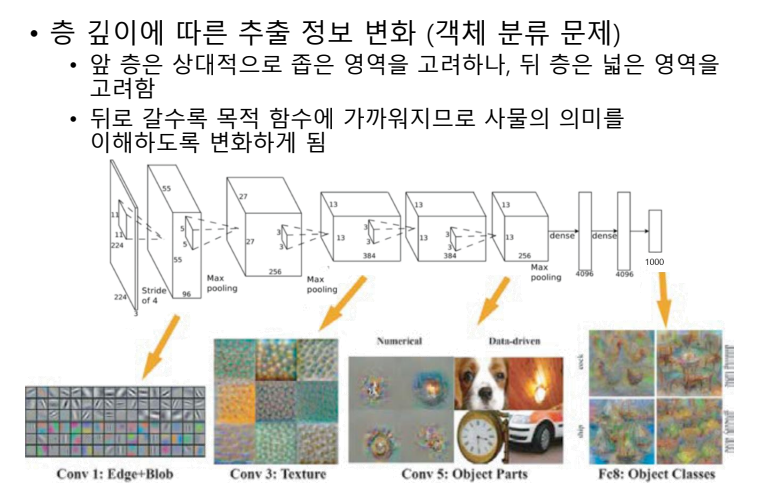

대표적인 CNN

- LeNet : 손글씨 숫자를 인식하는 네트워크.
 - 합성곱 계층과 풀링(서브샘플링)계층을 반복하고 마지막에 완전 연결 계층이 위치한다.
 - 시그모이드 함수를 사용한다.
 - 최대풀링 대신 단순히 원소를 줄이기만 하는 서브샘플링을 사용한다.
 > 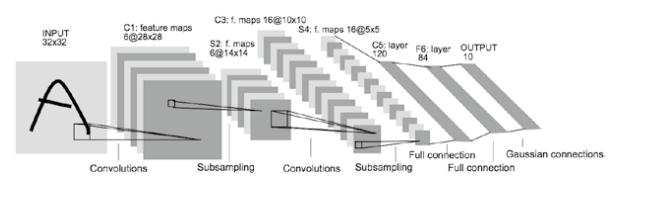

- AlexNet : 합성곱 계층과 풀링 계층을 반복하고 마지막에 완전연결 계층이 위치한다.
 - LeNet과 달리 활성화 함수로 ReLU를 이용하고, LRN을 통해 한필터에서만 과도하게 activate 되는 것을 막는다.
 - 드롭아웃을 사용한다.
 > 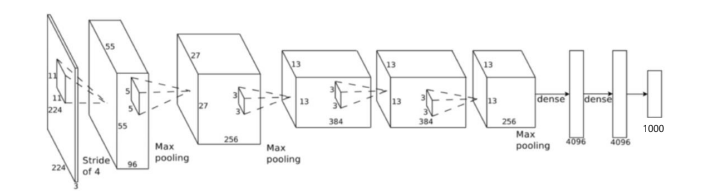